Name: Yash Bhanushali                                                     
Task : Create Decision Tree Classifier and visualize it. If we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [ ]:
!pip install dtreeviz
!pip install pydotplus
!apt-get install graphviz -y

In [2]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from itertools import product
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import dtreeviz

In [3]:

df = pd.read_csv('/content/iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


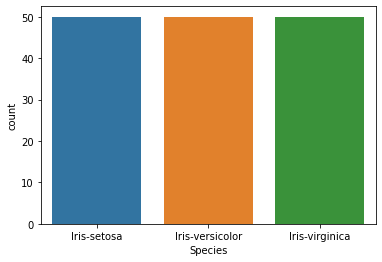

In [9]:
sns.countplot(df['Species'])

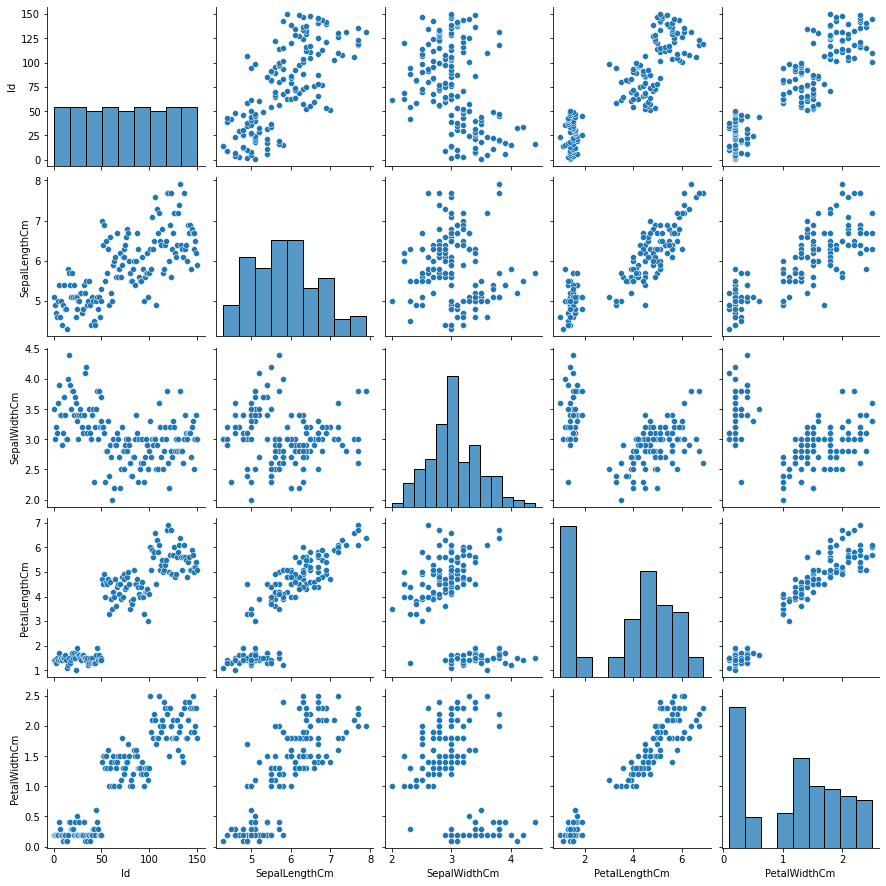

In [10]:
sns.pairplot(data=df)

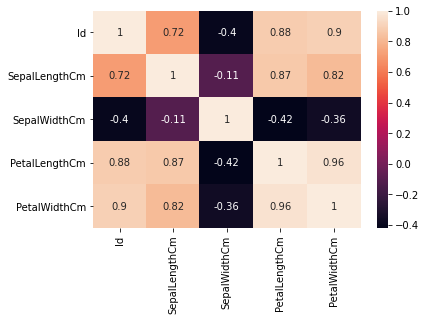

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


**Encode the labels**

In [13]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Species)

df['target'] = label_encoder.transform(df.Species)

In [14]:
X = df.iloc[:, [1, 2, 3, 4]].values
y = df.target

In [ ]:
X

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
#build the decision tree model
model = DecisionTreeClassifier(max_depth=8, random_state=1)

In [20]:
#Fit the Decision Tree

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

**Visualize the Decision Tree**

In [21]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



**Perform Prediction**

In [22]:
pred_test = model.predict(X_test)

In [23]:
pd.DataFrame([pred_test, y_test]).T.head(10)

,0,1
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2



**Check the accuracy of predictions**

In [24]:
accuracy_score(pred_test, y_test)

0.9666666666666667

In [25]:
df['Predicted_class'] = [list(df['Species'].unique())[int(i)] for i in model.predict(X)]

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target,Predicted_class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa


In [27]:
accuracy_score(df['Species'], df['Predicted_class'])

0.9933333333333333

**To plot the Decision Boundaries, we need dimension reduction of features, so let's use PCA**

In [28]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
model2 = DecisionTreeClassifier(max_depth=8)
model2.fit(X_train2, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


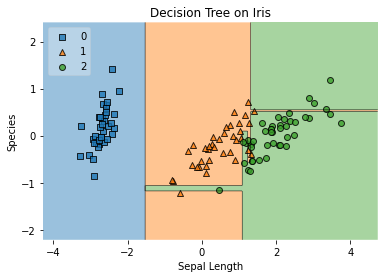

In [29]:
plot_decision_regions(X_train2, np.array(y_train), clf=model2, legend=2)

# Adding axes annotations
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.title('Decision Tree on Iris')
plt.show()

**Decision Tree Visulization**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


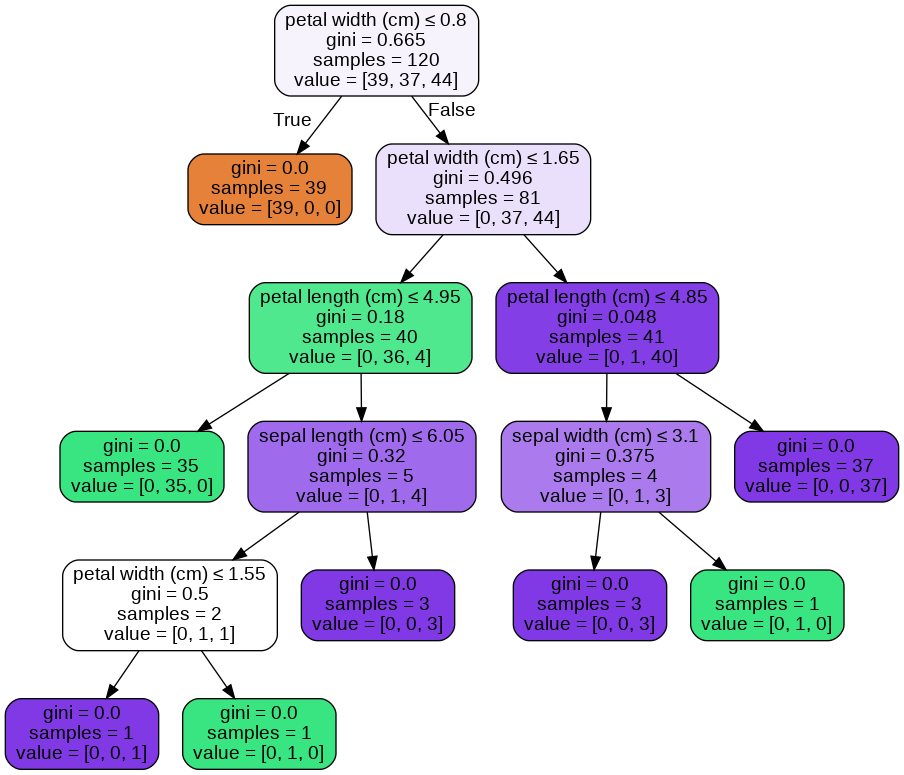

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import sklearn.datasets as datasets 
from sklearn.tree import export_graphviz
import pydotplus
iris=datasets.load_iris()
# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names= iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


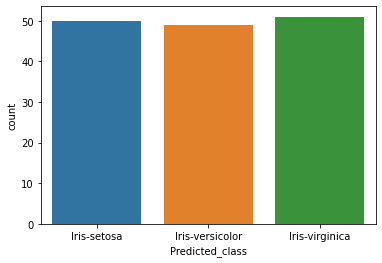

In [31]:
sns.countplot(df['Predicted_class'])